1. Input continuous BGR images from webcam.
2. Use <i>MediaPipe()</i> to detect and track one of your hands.
3. Obtain the positions of 21 HandLandmarks.
4. Design an algorithm to recognize three hand gestures of Rock, Scissor, Paper.
5. Use <i>cv2.putText()</i> to write the type of the recognized hand gesture on the upper left corner.
6. Show your output images.
7. Upload your Jupyter code file (*.ipynb)


In [4]:
from turtle import color
import cv2
import mediapipe as mp
import time


cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

mpHands = mp.solutions.hands
hands = mpHands.Hands()
hands = mpHands.Hands(static_image_mode=False,
                      max_num_hands=4,
                      min_detection_confidence=0.5,
                      min_tracking_confidence=0.5)
mpDraw = mp.solutions.drawing_utils
handstyledot = mpDraw.DrawingSpec(color = (0,100,0), thickness = 7)
handstyle2line = mpDraw.DrawingSpec(color = (0,255,127), thickness = 4)
pTime = 0
cTime = 0

id = [4,8,12,16,20]
finger = [0,0,0,0,0]

while True:
    success, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(imgRGB)
    #print(results.multi_hand_landmarks)
    imgHeight = img.shape[0]
    imgWidth = img.shape[1]
    if results.multi_hand_landmarks:
        for handLms in results.multi_hand_landmarks:
            mpDraw.draw_landmarks(img, handLms, mpHands.HAND_CONNECTIONS, handstyle2line, handstyledot)         
            id = [4,8,12,16,20]
            finger = []
            for idd in range(0,5):
                if idd==0:
                    #x = 5     
                    if( handLms.landmark[4].y > handLms.landmark[5].y):#大拇指y座標小於食指第index5指y座標
                        finger.append(0)
                    else:
                        finger.append(1)   
                else:
                    if( handLms.landmark[id[idd]].y > handLms.landmark[id[idd]-2].y):
                        finger.append(0)
                    else:
                        finger.append(1)
            #print(finger)
            if finger == [0,0,0,0,0] or finger == [1,0,0,0,0]:
                cv2.putText(img,"Rock", (10,70), cv2.FONT_HERSHEY_PLAIN, 3, (0,0,255), 3)
            elif finger == [0,1,1,0,0] or finger == [0,0,1,1,0] or finger == [1,1,1,0,0]:
                cv2.putText(img,"Scissor", (10,70), cv2.FONT_HERSHEY_PLAIN, 3, (0,0,255), 3)
            elif finger == [1,1,1,1,1] or finger == [0,1,1,1,1]:
                cv2.putText(img,"Paper", (10,70), cv2.FONT_HERSHEY_PLAIN, 3, (0,0,255), 3)
            else:
                cv2.putText(img,"Cant not identify", (10,70), cv2.FONT_HERSHEY_PLAIN, 3, (0,0,255), 3)

    cv2.imshow("Image", img)
    c = cv2.waitKey(1)
    if c == ord('q') or c == 27:
        break
    cv2.waitKey(1)
cap.release()
cv2.destroyAllWindows()

### example output
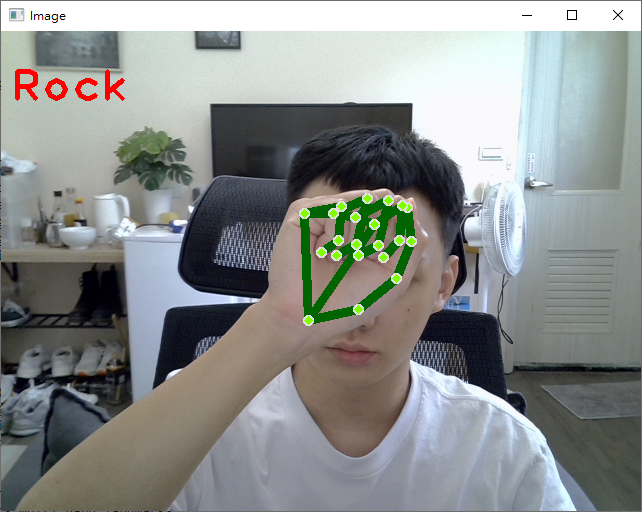
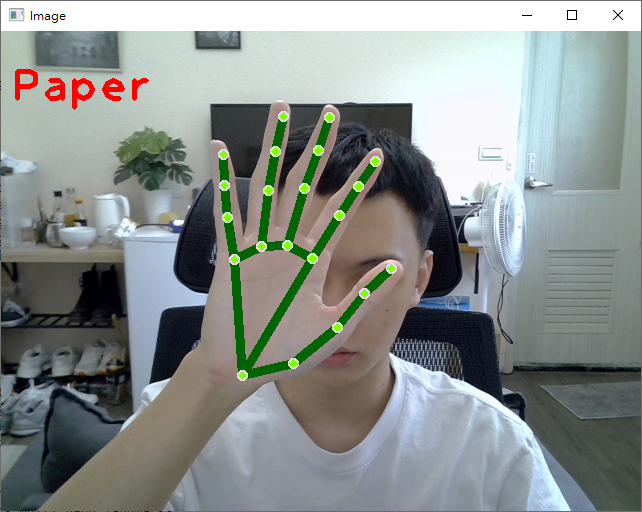
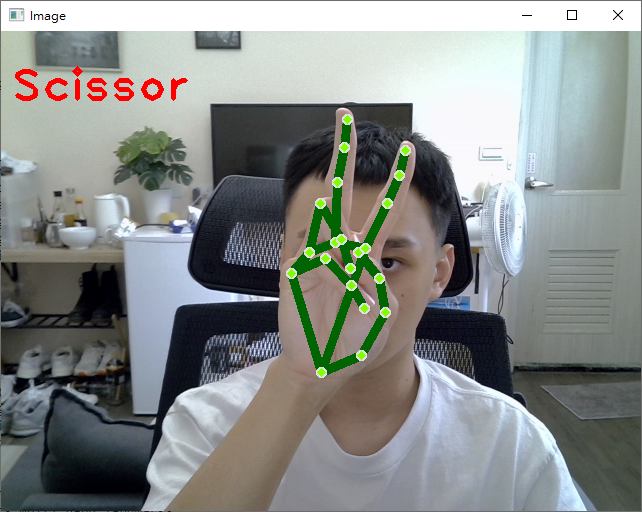

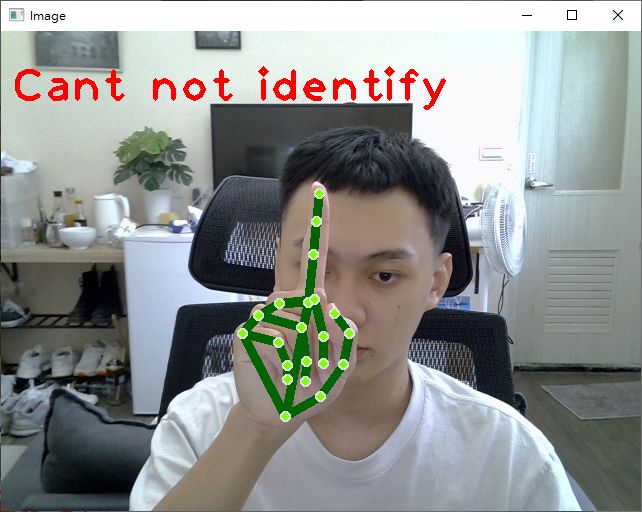